In [21]:
!pip install --upgrade pyxdf mne pandas jupyterlab ipympl ipywidgets


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
import sys
print(sys.version)

In [13]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne
import pandas as pd
import os
from src.UnicornData import UnicornData

In [14]:
data_path = '../../data/mmn'
data_file = 'mmn_nani'
os.listdir(data_path)

['mmn_nani.xdf', 'mmn_nani.csv']

In [15]:
csv_data = pd.read_csv(f'{data_path}/{data_file}.csv')
csv_data.head()

,timestamp_iso,block,trial,marker,is_deviant,isi_s,tone_dur_s,std_partials_hz,dev_partials_hz
0,2025-10-03T06:44:00.050,1,1,1,0,0.468624,0.1,500;1000;1500,550;1100;1650
1,2025-10-03T06:44:00.683,1,2,1,0,0.506582,0.1,500;1000;1500,550;1100;1650
2,2025-10-03T06:44:01.300,1,3,1,0,0.495038,0.1,500;1000;1500,550;1100;1650
3,2025-10-03T06:44:01.933,1,4,1,0,0.496855,0.1,500;1000;1500,550;1100;1650
4,2025-10-03T06:44:02.598,1,5,1,0,0.544812,0.1,500;1000;1500,550;1100;1650


In [16]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day

In [17]:
data = UnicornData(f'{data_path}/{data_file}.xdf', delay=CONST_OFFSET)
raw = data.filter().raw
raw

Markers 1441
Data 255910
Creating RawArray with float64 data, n_channels=8, n_times=255910
    Range : 0 ... 255909 =      0.000 ...  1023.636 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


<RawArray | 8 x 255910 (1023.6 s), ~15.6 MB, data loaded>

In [18]:
picks = ["Fz", "Cz"]
event_dict = dict(oddball=2, target=1)
tmin, tmax = -0.2, 0.8
epochs = data.create_epochs(picks, event_dict, tmin, tmax)

Not setting metadata
1440 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1440 events and 251 original time points ...
0 bad epochs dropped


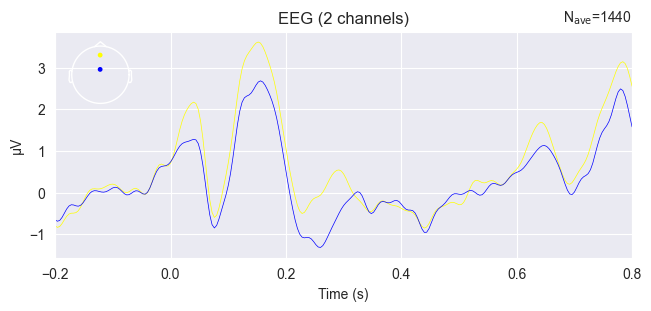

In [19]:
epochs.average().plot(picks=picks)
plt.show()

combining channels using "mean"
combining channels using "mean"


/var/folders/g2/378vjvgj0vq1r9_l6pb_nbz00000gn/T/ipykernel_634/1106949685.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


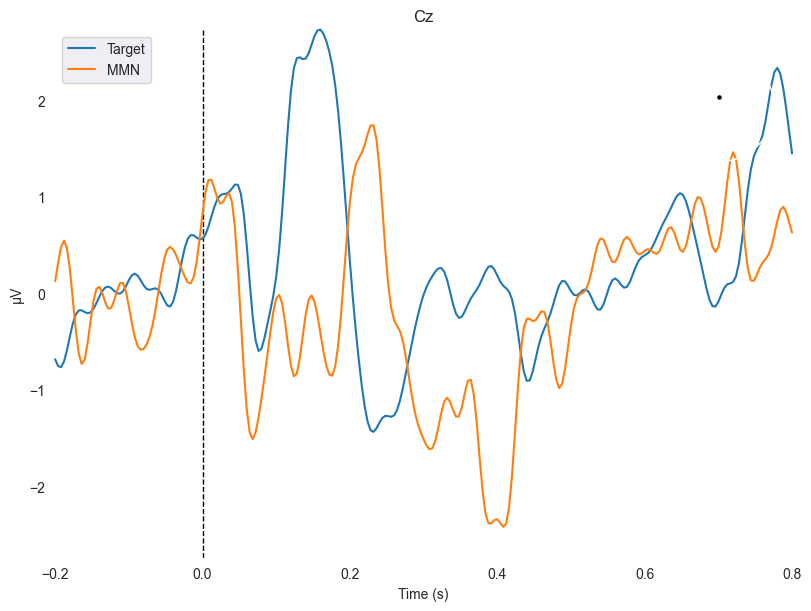

[<Figure size 800x600 with 2 Axes>]

In [20]:
mmn = mne.combine_evoked([epochs['oddball'].average(), epochs['target'].average()], weights=[1, -1])
mne.viz.plot_compare_evokeds(
    {"Target": epochs['target'].average(), "MMN": mmn},
    picks='Cz',
    combine='mean',
    show=True
)